# Grade: /100 pts

# Assignment 06: Regularization

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import Ridge
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.metrics import mean_squared_error

pd.set_option('display.max_columns', 500)

%matplotlib inline

### Question 1: Preprocessing (5 pts)
**Make sure to only use the imports included in the first cell. Any additional imports used will result in 0.** <br>
Tasks:
* Load the data present in 'footballer_small.csv' using the pandas library and store the loaded data in a dataframe
* Drop the variables: 'ID','club','club_logo','flag', 'nationality','photo','potential', 'birth_date'
* Dummy code the variables: work_rate_att, work_rate_def, preferred_foot. **Because we are running a regularized model, we do not want to drop the first column**
* Get a test data set of size 500 - to make results comparable to solutions, set random_state = 0 <br>

In [10]:
# Load the data
df = pd.read_csv('footballer_small.csv')

#drop the indicated variables
df.drop(columns= ['ID', 'club', 'club_logo', 'flag', 'nationality', 'photo', 'potential','birth_date'], inplace=True)

#dummy code the variables
df = pd.get_dummies(df, columns=['work_rate_att', 'work_rate_def', 'preferred_foot'], drop_first=False)

#get test data (use overall as prediction target)
X = df.drop(columns=['overall'])
y = df['overall']
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=500, random_state=0)

#df.head()



## Question 2: Building the pipeline that preprocesses the data (10 pts)
In order to properly build the regression model, the features need to be standardized so that no feature can dominate others in determining the prediction values due to differences in feature scales. Build the pipeline that preprocesses the feature columns of the training data and create a linear regression model. Plot the data before and after the standardization for the stamina feature. <br>
In this question, there is no need to overwrite the training set's values. Create a new variable to include the standardized data. The original training data is needed for future exercises. <br>
### Question
Make observations about the plot.  
Question is answered in a markdown below the plots

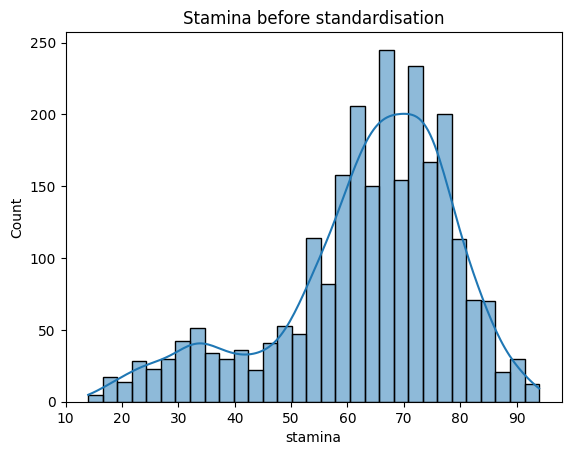

C:\Users\Boo\AppData\Local\Temp\ipykernel_28588\2883077675.py:8: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[-1.08571793 -0.86962886 -0.00527257 ...  1.50735092  1.50735092
 -1.51789607]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  Xtrain_standardized.iloc[:, :] = StandardScaler().fit_transform(Xtrain) #standardise all the features
C:\Users\Boo\AppData\Local\Temp\ipykernel_28588\2883077675.py:8: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[-0.63112915  1.15023841  0.4939451  ... -0.06859203  1.33775078
 -0.34986059]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  Xtrain_standardized.iloc[:, :] = StandardScaler().fit_transform(Xtrain) #standardise all the features
C:\Users\Boo\AppData\Local\Temp\ipykernel_28588\2883077675.py:8: FutureWarning: Setting an i

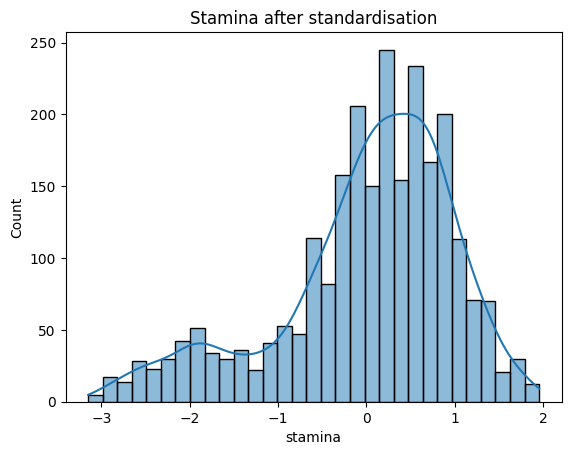

Pipeline(steps=[('scaling', StandardScaler()), ('lin_reg', LinearRegression())])

In [3]:


#plot stamina before standardisation
sns.histplot(Xtrain['stamina'], kde=True)
plt.title('Stamina before standardisation')
plt.show()

#standardise training data (all features)
Xtrain_standardized = Xtrain.copy()
Xtrain_standardized.iloc[:, :] = StandardScaler().fit_transform(Xtrain) #standardise all the features

#plot stamina after standardisation
sns.histplot(Xtrain_standardized['stamina'], kde=True)
plt.title('Stamina after standardisation')
plt.show()

# build pipeline for preprocessing
pipe = Pipeline([('scaling', StandardScaler()),('lin_reg', sk.linear_model.LinearRegression())])
# create linear regression model
pipe.fit(Xtrain, ytrain)

Question Answer

stardisation is a linear transformation thus the distribution of 'stamina' features (and other features) maintains the shape of the original distribution.

## Question 3: Creating a Complex feature model using 2-nd Polynomial features (10 pts)
In this task, the training data consists of the quadratic terms and 2-way interactions of all features except one of standing_tackle, composure, and marking variable. <br> 
Create <b> four </b> different training sets:
* The first training set includes the quadratic terms and 2-way interactions of all the features. 
* The second/third/fourth training sets include all the features, their quadratic terms, and their 2-way interactions except the standing_tackle/composure/marking features. <br>

#### Hint: 
For the 2nd/3rd and 4th training sets, create the training sets without the aforementioned features and then apply polynomial expansion to the resultant sets. 
### Questions:
* How many linear terms are in each of the new feature set?
* How many squared terms are in each of the new feature set?
* How many interaction terms are in each of the new feature set? Give an example of one of the interaction terms. 

In [4]:
X = df.drop(columns=['overall'])
y = df['overall']
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=500, random_state=0)

poly = PolynomialFeatures(degree=2, include_bias=False)

#training set1
Xtrain_one = poly.fit_transform(Xtrain)

#training set2
Xtrain_without_standing_tackle = Xtrain.drop(columns=['standing_tackle'])
Xtrain_two = poly.fit_transform(Xtrain_without_standing_tackle)

#training set3
Xtrain_without_composure = Xtrain.drop(columns=['composure'])
Xtrain_three = poly.fit_transform(Xtrain_without_composure)

#training set4
Xtrain_without_marking = Xtrain.drop(columns=['marking'])
Xtrain_four = poly.fit_transform(Xtrain_without_marking)

print("Training Set 1 shape:", Xtrain_one.shape)

Training Set 1 shape: (2500, 1224)


## Question 4: Evaluating the backward feature search (15 pts)
In this question, you have to use the pipeline created in question 2 and apply it to each of the training sets created in question 3. Use 10-fold cross validation to report the validation error on the training set using mean squared error as the metric. <br>
Show all the steps of the process and compare and analyze the results using the validation error reported. 

In [5]:
#set1
cv_score_one = cross_val_score(pipe, Xtrain_one, ytrain, cv=10, scoring='neg_mean_squared_error')
mean_one= -cv_score_one.mean()
std_one= cv_score_one.std()
print(f"Validation error set1: mean={mean_one}, std={std_one}")

#set2
cv_score_two = cross_val_score(pipe, Xtrain_two, ytrain, cv=10, scoring='neg_mean_squared_error')
mean_two= -cv_score_two.mean()
std_two= cv_score_two.std()
print(f"Validation error set2: mean={mean_two}, std={std_two}")

#set3
cv_score_three = cross_val_score(pipe, Xtrain_three, ytrain, cv=10, scoring='neg_mean_squared_error')
mean_three= -cv_score_three.mean()
std_three= cv_score_three.std()
print(f"Validation error set3: mean={mean_three}, std={std_three}")

#set4
cv_score_four = cross_val_score(pipe, Xtrain_four, ytrain, cv=10, scoring='neg_mean_squared_error')
mean_four= -cv_score_four.mean()
std_four= cv_score_four.std()
print(f"Validation error set4: mean={mean_four}, std={std_four}")


Validation error set1: mean=2.974976565290061, std=0.4914852931189834
Validation error set2: mean=2.7537622671004724, std=0.4166039563884483
Validation error set3: mean=2.8060606862128217, std=0.429963701931243
Validation error set4: mean=2.696867469723911, std=0.4152752742703787


Set 1 (including all features) showed highest standard deviation, potentially due to higher degree of outliers/noise or non relevant features being included and causing higher degree of variability between the 10-fold regressions.

Set 2,3 both showed slight improvement through reduced standard deviation between each folds.

Set 4 (excluding 'marking' feature) showed the best result with lowest standard deviation.

## Question 5: Applying Ridge Regression (10 pts)
Build a pipeline that performs scaling and fits the ridge regression on the data that includes the polynomial expansion of all the features. The penalization parameter is set to 0.5. Use the pipeline to report the validation error using mean square error metric. Use 10-fold cross validation. 

In [6]:
#will re create set1 poly variable for coherency
Xtrain_poly = poly.fit_transform(Xtrain)
Xtest_poly = poly.transform(Xtest)

#create ridge pipeline
#RidgeModel = Pipeline([('scaling', StandardScaler()), ('ridge_reg', Ridge(alpha=0.5))])
RidgeModel = Ridge(alpha=5.0, fit_intercept=True)
model = RidgeModel.fit(Xtrain_poly, ytrain)

cv_score_ridge = cross_val_score(RidgeModel, Xtrain_poly, ytrain, cv=10, scoring='neg_mean_squared_error')
mean_ridge= -cv_score_ridge.mean()
std_ridge= cv_score_ridge.std()
#print(cv_score_ridge)
print(f"Validation error using ridge regression: mean={mean_ridge}, std={std_ridge}")

Validation error using ridge regression: mean=2.785149498087011, std=0.4645286118371237


## Question 6: Tune the Ridge coefficient for the 2nd-order model   (15 pts)
Now use 10-fold CV on the training set to determine a good setting for the regularization coefficient. Perform the search going from $\lambda = \exp(-8), \cdots, \exp(6)$ in 15 evenly spaced increments on the log scale. Plot the mean squared error as a function of $\log(\lambda)$. 

### Questions: 

What is the best regularization parameter (actual not approximate)? 

Why does the error increase as $\lambda \rightarrow 0?$  Why does the error increase when $\lambda \rightarrow \infty$?  Answer in terms of the bias variance trade off.

C:\Users\Boo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=3.7001e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
C:\Users\Boo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=3.77329e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
C:\Users\Boo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=3.7172e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
C:\Users\Boo\AppData\Local\

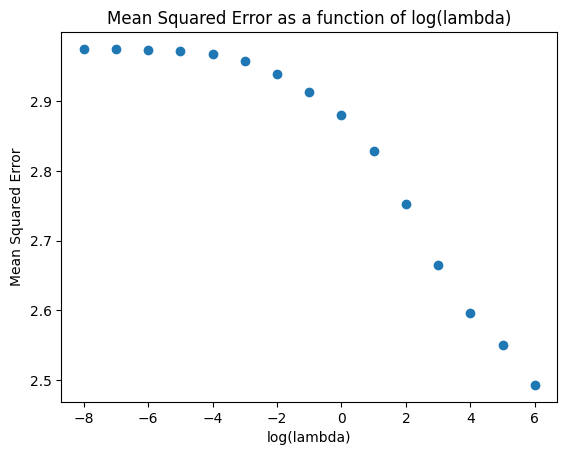

In [7]:
#evenly spaced lamda values
lam = np.exp(np.linspace(-8, 6, 15))
mse = np.zeros(15) #for showing on graph

#RidgeModel = Ridge()
#perform search each lambda val
for i in range(lam.size):
    #RidgeModel = Pipeline([('scaling', StandardScaler()), ('ridge_reg', Ridge(alpha=i))])
    cv_scores = cross_val_score(Ridge(alpha=lam[i]), Xtrain_poly, ytrain, cv=10, scoring='neg_mean_squared_error')
    mse[i]= -cv_scores.mean()

#plot
plt.scatter(np.log(lam), mse)
plt.title('Mean Squared Error as a function of log(lambda)')
plt.xlabel('log(lambda)')
plt.ylabel('Mean Squared Error')
plt.show()
    

exp(6) shown in graph as log(lambda)=6 is the best parameter, as it shows the least Mean square error value.

As lambda approaches zero, model fits the data closely with low bias, but could cause high variance due to overfitting. As lambda approaches infinity, model shows higher bias due to higher degree of regularization, but the potential overfitting and increase in variance could decrease.



### Question 7: Test error  (10 pts)
Now test how the ridge model, fitted to the whole training set, performs on the test data set. 


Report the following:

* The mean squared error on the test data - along with the 95% confidence interval, determined with the central limit theorem. 
* The proportion of the variance explained by your model - along wth a 95% confidence interval.

In [8]:
#make prediction
RidgeModel.fit(Xtrain_poly, ytrain)
ypred = RidgeModel.predict(Xtest_poly)

#get mse value
mse_test = mean_squared_error(ytest, ypred)
print(f"mse of test set: {mse_test}")

#get 95% ci
std_mse = np.std((ytest-ypred)**2)
ci_mse = 1.96 * (std_mse/(np.sqrt(len(ytest))))
print(f"95% confidence interval for mse: {mse_test} ± {ci_mse}")

#proportion variance - explained by r2
rss = np.sum((ytest-ypred) ** 2)
tss = np.sum((ytest-np.mean(ytest))**2)
rsquared_test = 1 - (rss/tss)
print(f"proprtion of variance: {rsquared_test}")

#ci of r2 (NOT SURE)
rsquared_var = (1-rsquared_test) * (1+rsquared_test) / (len(ytest))
rsquared_ci = 1.96 * np.sqrt(rsquared_var)
print(f"95% confidence interval for proportion of variance: {rsquared_test} ± {rsquared_ci}")


mse of test set: 2.8046815699928915
95% confidence interval for mse: 2.8046815699928915 ± 0.5064591942848868
proprtion of variance: 0.9455820243210021
95% confidence interval for proportion of variance: 0.9455820243210021 ± 0.02852115000821226


## Question 8: Analyzing Ridge Coefficients (15 pts)
In this question, you are first required to extract all the coefficients of the standing tackle, composure and marking features from the best model of question 7. After that, calculate the mean of the coefficients of the aforementioned features and analyze the results. Based on these observations, draw conclusions about the results in question 4. 

In [9]:
features = df.columns.values
standing_tackle_index = np.where(features == 'standing_tackle')[0][0]
composure_index = np.where(features == 'composure')[0][0]
marking_index = np.where(features == 'marking')[0][0]
coefficients = model.coef_

standing_tackle_coef = coefficients[standing_tackle_index]
composure_coef = coefficients[composure_index]
marking_coef = coefficients[marking_index]
mean_coef = (standing_tackle_coef + composure_coef + marking_coef) / 3

print(f"standing_tackle coeffecient: {standing_tackle_coef}")
print(f"composure coeffecient: {composure_coef}")
print(f"marking coeffecient: {marking_coef}")
print(f"mean of the coefficients: {mean_coef}")

standing_tackle coeffecient: -0.002974151444888954
composure coeffecient: -0.083457146979851
marking coeffecient: 0.0770035942931726
mean of the coefficients: -0.0031425680438557833


standing_tackle and composure contributes to the negative overall rating of the player while marking positively influences.

## Question 9: Lasso Regression (10 pts)
Let us assume that you are building a linear regression model using only three features: standing tackle, marking, and composure to predict a player's overall rating. Based on the results of question 8, what do you think will be the features' coefficients while applying the lasso regression optimization? Answer in no more than 5 sentences. 

Lasso regression minimizes the coefficient to near zero value for the less siginificant feature coefficients. With this knowledge, we can assume that features with lower coefficient such as 'standing_tackle' will be minimized to zero/near zero value. If the optimisation process deems more larger in magnitude coefficient for 'composure' and 'marking' significant, the lasso regression will not reduce these coefficients as much.

## Note: 
After completing all the tasks and before submitting: 
* Restart you kernel by clicking 'Restart & Run all'
* Fix any errors resulting from the first step.
* Repeat the first two steps until no errors are encountered. 